In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

### Import Data

In [2]:
sales = pd.read_csv('sales_train.csv.gz')
items0 = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')
test_set = pd.read_csv('test.csv.gz').set_index('ID')

In [3]:
items = pd.DataFrame(items0,index=None)

### First look at the data

In [4]:
print(type(items))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(sales.head())
print(items.head())
print(item_categories.head())
print(shops.head())
print(test_set.head())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
        item_category_name  item_

In [6]:
sales.shape

(2935849, 6)

In [7]:
sales.isnull().any()

date              False
date_block_num    False
shop_id           False
item_id           False
item_price        False
item_cnt_day      False
dtype: bool

In [8]:
sales.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [9]:
sales = sales.join(items, on='item_id', how='left', rsuffix='_2').drop(['item_name', 'item_id_2'], axis=1)

In [10]:
# Restrict the training set to only the shop_id that appear in the test set
#sales = sales[sales['shop_id'].isin(test_set['shop_id'].unique())]

In [11]:
sales.shape

(2935849, 7)

In [12]:
# Restrict the training set to only the item_id that appear in the test set
#sales = sales[sales['item_id'].isin(test_set['item_id'].unique())]

In [13]:
sales.shape

(2935849, 7)

In [14]:
test_set['shop_id'].unique().shape

(42,)

In [15]:
test_set['item_id'].unique().shape

(5100,)

In [16]:
np.sum(sales['item_price'] < 0)

1

In [17]:
# Judgement call to include returned items or not. I won't include them to use only sales to predict future sales
sales = sales.query('item_cnt_day > 0 & item_price > 0')

In [18]:
sales.shape

(2928492, 7)

### Look for outliers

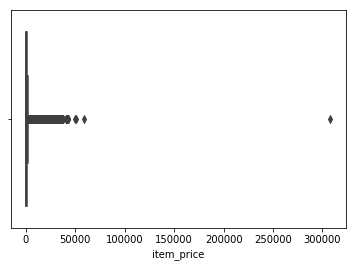

In [19]:
sns.boxplot(sales['item_price'])

In [20]:
sales['item_price'].sort_values().iloc[-100:]

2932600     32990.0
2888030     32990.0
2903074     32990.0
2935504     32990.0
2935492     32990.0
2932210     32990.0
2875854     32990.0
2895869     32990.0
2506287     32990.0
2867781     32990.0
2913586     32990.0
2892592     32990.0
2913587     32990.0
2913588     32990.0
2900664     32990.0
2853570     32990.0
2915836     32990.0
2894209     32990.0
2916499     32990.0
2916500     32990.0
2831989     32990.0
2894005     32990.0
2834039     32990.0
2908338     32990.0
2907579     32990.0
2843836     32990.0
2550651     32990.0
2870059     32990.0
2870058     32990.0
2515389     32990.0
             ...   
2608059     35300.0
2456433     35490.0
2480977     35490.0
2425790     35490.0
2532303     35490.0
2454932     35490.0
2531465     35990.0
1058026     35990.0
2464450     35990.0
2890617     35991.0
884848      36990.0
1592289     36990.0
1656109     36990.0
1394150     36990.0
2932637     37991.0
2885694     37991.0
2143903     40900.0
2927572     40991.0
2893100     41990.0


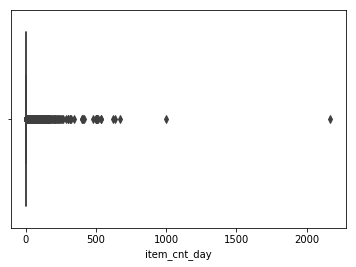

In [21]:
sns.boxplot(sales['item_cnt_day'])

In [22]:
sales['item_cnt_day'].sort_values().iloc[-50:]

1686924     164.0
2185126     167.0
1014331     168.0
853771      168.0
890809      171.0
2555809     171.0
1650935     171.0
2660666     179.0
2625791     187.0
1170070     194.0
2048497     195.0
566159      200.0
2296209     205.0
2626213     205.0
2567454     207.0
845690      217.0
2341308     222.0
2660602     230.0
2578940     231.0
1618930     240.0
1058340     242.0
1782715     251.0
1170072     255.0
862929      264.0
890790      288.0
2597018     299.0
1549966     300.0
2406023     313.0
2137371     313.0
2406117     325.0
2626133     343.0
2067667     401.0
1573252     401.0
1501160     405.0
2067677     412.0
2625847     480.0
2909401     500.0
2257299     500.0
1708207     501.0
1573253     502.0
2864260     504.0
2067669     508.0
2048518     512.0
2851073     533.0
2626181     539.0
2608040     624.0
2851091     637.0
2864235     669.0
2326930    1000.0
2909818    2169.0
Name: item_cnt_day, dtype: float64

In [23]:
# Remove outliers
sales = sales.query('item_price <= 100000 and item_cnt_day <= 1000 ')

In [24]:
sales.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56
5,10.01.2013,0,25,2564,349.00,1.0,59


### Group features by month

In [25]:
monthly_features = sales.copy()

In [26]:
monthly_features = sales.groupby(['date_block_num','shop_id','item_id'], as_index=False)\
.agg({'item_price':'mean', 'item_cnt_day':['sum','count']})

monthly_features.columns = ['date_block_num', 'shop_id', 'item_id',\
                            'item_price_mean', 'item_cnt_month', 'transactions']

monthly_features_by_itemid = sales.sort_values(by='date').groupby(['date_block_num','item_id'], as_index=False)\
.agg({'item_price':'mean', 'item_cnt_day':'sum'})

monthly_features_by_itemid.columns = ['date_block_num', 'item_id','item_price_mean_by_itemid', 'item_cnt_month_by_itemid']

#monthly_features['item_revenue'] = monthly_features['item_price_mean'] * monthly_features['item_cnt_month']

In [27]:
monthly_features.head(10)

,date_block_num,shop_id,item_id,item_price_mean,item_cnt_month,transactions
0,0,0,32,221.0,6.0,4
1,0,0,33,347.0,3.0,3
2,0,0,35,247.0,1.0,1
3,0,0,43,221.0,1.0,1
4,0,0,51,128.5,2.0,2
5,0,0,61,195.0,1.0,1
6,0,0,75,76.0,1.0,1
7,0,0,88,76.0,1.0,1
8,0,0,95,193.0,1.0,1
9,0,0,96,70.0,1.0,1


In [28]:
monthly_features_by_itemid.head(10)

,date_block_num,item_id,item_price_mean_by_itemid,item_cnt_month_by_itemid
0,0,19,28.000000,1.0
1,0,27,2325.000000,7.0
2,0,28,549.000000,8.0
3,0,29,2377.200000,5.0
4,0,32,338.110349,299.0
5,0,33,488.517241,61.0
6,0,34,140.888889,9.0
7,0,35,390.709091,78.0
8,0,40,219.250000,4.0
9,0,41,222.555556,9.0


In [29]:
print(monthly_features.shape)
print(monthly_features_by_itemid.shape)

(1608225, 6)
(233801, 4)


In [30]:
# Clip the target variable to make it similar to the test predictions
monthly_features['item_cnt_month'] = monthly_features['item_cnt_month'].clip(0,20) # VERY IMPORTANT

In [31]:
np.sum(monthly_features['item_cnt_month'] > 20)

0

### Create matrix of all possible combinations from date_block_num, shop_id and test_id in the test set

In [32]:
from itertools import product
index_cols = [ 'date_block_num', 'shop_id', 'item_id']

# For every month we create a grid from all shops/items combinations from that month
all_combinations_list = [] 
for block_num in sales['date_block_num'].unique():
    cur_shops = sales[sales['date_block_num']==block_num]['shop_id'].unique()
    cur_items = sales[sales['date_block_num']==block_num]['item_id'].unique()
    all_combinations_list.append(np.array(list(product(*[[block_num], cur_shops, cur_items ])),dtype='int32'))

#turn the grid into pandas dataframe
all_combinations_df = pd.DataFrame(np.vstack(all_combinations_list), columns = index_cols,dtype=np.int32)

#sort the data
all_combinations_df.sort_values(['date_block_num','shop_id','item_id'],inplace=True)

In [33]:
## Why is this block of code not ok??
#from itertools import product
#index_cols = ['date_block_num', 'shop_id', 'item_id']

#month = sales['date_block_num'].unique()
#shop = test_set['shop_id'].unique()
#item = test_set['item_id'].unique()

#all_combinations_list2 = np.array(list(product(*[month,shop,item])),dtype='int32')
#all_combinations_df2 = pd.DataFrame(np.vstack(all_combinations_list2), columns = index_cols, dtype=np.int32)

#print(all_combinations_df2.shape)
#all_combinations_df2.head()

## Because we add to many sales of value 0, even for ['shop_id','item_id'] that didn't even exist

In [34]:
print(all_combinations_df.shape)
all_combinations_df.head()

(10884508, 3)


,date_block_num,shop_id,item_id
139168,0,0,19
141406,0,0,27
144881,0,0,28
142572,0,0,29
138861,0,0,32


In [35]:
train_set = pd.merge(all_combinations_df, monthly_features, on=index_cols, how='left')
train_set = pd.merge(train_set, monthly_features_by_itemid, on=['date_block_num','item_id'], how='left')
train_set.fillna(0, inplace=True)
print(train_set.shape)
train_set.head(20)

(10884508, 8)


,date_block_num,shop_id,item_id,item_price_mean,item_cnt_month,transactions,item_price_mean_by_itemid,item_cnt_month_by_itemid
0,0,0,19,0.0,0.0,0.0,28.000000,1.0
1,0,0,27,0.0,0.0,0.0,2325.000000,7.0
2,0,0,28,0.0,0.0,0.0,549.000000,8.0
3,0,0,29,0.0,0.0,0.0,2377.200000,5.0
4,0,0,32,221.0,6.0,4.0,338.110349,299.0
5,0,0,33,347.0,3.0,3.0,488.517241,61.0
6,0,0,34,0.0,0.0,0.0,140.888889,9.0
7,0,0,35,247.0,1.0,1.0,390.709091,78.0
8,0,0,40,0.0,0.0,0.0,219.250000,4.0
9,0,0,41,0.0,0.0,0.0,222.555556,9.0


In [36]:
test_set.head()

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [37]:
test_set['date_block_num'] = 34
test_set['date_block_num'] = test_set['date_block_num'].astype(np.int8)
test_set['shop_id'] = test_set['shop_id'].astype(np.int8)
test_set['item_id'] = test_set['item_id'].astype(np.int16)

In [38]:
# Modify the last month to include additional shop_id and item_id from the test_set 
#month_33 = train_set[train_set['date_block_num'] == 33]
#train_set = train_set[train_set['date_block_num'] != 33]
#month_33 = pd.merge(test_set, month_33, on= ['shop_id', 'item_id'], how='left')
#month_33.drop('ID', axis=1, inplace=True)
#month_33['date_block_num'].fillna(33, inplace=True)
#month_33.shape

In [39]:
train_set = pd.concat([train_set, test_set], sort=False, ignore_index=True, keys = index_cols)
train_set.fillna(0, inplace=True)
train_set.shape

(11098708, 8)

In [40]:
train_set[train_set['date_block_num'] == 34].head()

,date_block_num,shop_id,item_id,item_price_mean,item_cnt_month,transactions,item_price_mean_by_itemid,item_cnt_month_by_itemid
10884508,34,5,5037,0.0,0.0,0.0,0.0,0.0
10884509,34,5,5320,0.0,0.0,0.0,0.0,0.0
10884510,34,5,5233,0.0,0.0,0.0,0.0,0.0
10884511,34,5,5232,0.0,0.0,0.0,0.0,0.0
10884512,34,5,5268,0.0,0.0,0.0,0.0,0.0


In [41]:
# Get the item_category_id column to the train_set
train_set = train_set.merge(items[['item_id', 'item_category_id']], on='item_id', how='left')
#train_set.drop(['item_name'], axis=1, inplace=True)
train_set.head()

,date_block_num,shop_id,item_id,item_price_mean,item_cnt_month,transactions,item_price_mean_by_itemid,item_cnt_month_by_itemid,item_category_id
0,0,0,19,0.0,0.0,0.0,28.000000,1.0,40
1,0,0,27,0.0,0.0,0.0,2325.000000,7.0,19
2,0,0,28,0.0,0.0,0.0,549.000000,8.0,30
3,0,0,29,0.0,0.0,0.0,2377.200000,5.0,23
4,0,0,32,221.0,6.0,4.0,338.110349,299.0,40


In [42]:
del all_combinations_df
del all_combinations_list
del sales
del items

### Transform categories

In [43]:
# Fix category
    l_cat = list(item_categories['item_category_name'])
    for ind in range(0,1):
        l_cat[ind] = 'PC Headsets / Headphones'
    for ind in range(1,8):
        l_cat[ind] = 'Access'
    l_cat[8] = 'Tickets (figure)'
    l_cat[9] = 'Delivery of goods'
    for ind in range(10,18):
        l_cat[ind] = 'Consoles'
    for ind in range(18,25):
        l_cat[ind] = 'Consoles Games'
    l_cat[25] = 'Accessories for games'
    for ind in range(26,28):
        l_cat[ind] = 'phone games'
    for ind in range(28,32):
        l_cat[ind] = 'CD games'
    for ind in range(32,37):
        l_cat[ind] = 'Card'
    for ind in range(37,43):
        l_cat[ind] = 'Movie'
    for ind in range(43,55):
        l_cat[ind] = 'Books'
    for ind in range(55,61):
        l_cat[ind] = 'Music'
    for ind in range(61,73):
        l_cat[ind] = 'Gifts'
    for ind in range(73,79):
        l_cat[ind] = 'Soft'
    for ind in range(79,81):
        l_cat[ind] = 'Office'
    for ind in range(81,83):
        l_cat[ind] = 'Clean'
    l_cat[83] = 'Elements of a food'

In [44]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [45]:
item_categories['item_category_id_fix'] = lb.fit_transform(l_cat)
item_categories['item_category_name_fix'] = l_cat

In [46]:
item_categories

,item_category_name,item_category_id,item_category_id_fix,item_category_name_fix
0,PC - Гарнитуры/Наушники,0,14,PC Headsets / Headphones
1,Аксессуары - PS2,1,0,Access
2,Аксессуары - PS3,2,0,Access
3,Аксессуары - PS4,3,0,Access
4,Аксессуары - PSP,4,0,Access
5,Аксессуары - PSVita,5,0,Access
6,Аксессуары - XBOX 360,6,0,Access
7,Аксессуары - XBOX ONE,7,0,Access
8,Билеты (Цифра),8,16,Tickets (figure)
9,Доставка товара,9,8,Delivery of goods


In [47]:
train_set = train_set.merge(item_categories[['item_category_id', 'item_category_id_fix']], on = 'item_category_id', how = 'left')
train_set.drop(['item_category_id'],axis=1, inplace=True)
train_set.rename(columns = {'item_category_id_fix':'item_category_id'}, inplace = True)

item_categories.drop(['item_category_id'],axis=1, inplace=True)
item_categories.drop(['item_category_name'],axis=1, inplace=True)
item_categories.rename(columns = {'item_category_id_fix':'item_category_id'}, inplace = True)
item_categories.rename(columns = {'item_category_name_fix':'item_category_name'}, inplace = True)
item_categories = item_categories.drop_duplicates()
item_categories.index = np.arange(0, len(item_categories))

In [48]:
train_set.head()

,date_block_num,shop_id,item_id,item_price_mean,item_cnt_month,transactions,item_price_mean_by_itemid,item_cnt_month_by_itemid,item_category_id
0,0,0,19,0.0,0.0,0.0,28.000000,1.0,11
1,0,0,27,0.0,0.0,0.0,2325.000000,7.0,7
2,0,0,28,0.0,0.0,0.0,549.000000,8.0,3
3,0,0,29,0.0,0.0,0.0,2377.200000,5.0,7
4,0,0,32,221.0,6.0,4.0,338.110349,299.0,11


### Look at the monthly data

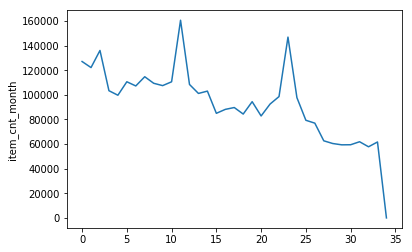

In [49]:
items_sold_month = train_set.groupby('date_block_num', as_index=True)['item_cnt_month'].sum()
sns.lineplot( train_set['date_block_num'].unique(), items_sold_month)

In [50]:
# We see peaks in months of December. Should we keep them?
print(items_sold_month)

date_block_num
0     127068.0
1     122152.0
2     136046.0
3     103361.0
4      99677.0
5     110612.0
6     107217.0
7     114702.0
8     109390.0
9     107486.0
10    110591.0
11    160599.0
12    108435.0
13    101126.0
14    103026.0
15     84984.0
16     88183.0
17     89682.0
18     84379.0
19     94435.0
20     82842.0
21     92499.0
22     98584.0
23    146892.0
24     97718.0
25     79330.0
26     76991.0
27     62645.0
28     60449.0
29     59382.0
30     59450.0
31     61886.0
32     57790.0
33     61700.0
34         0.0
Name: item_cnt_month, dtype: float64


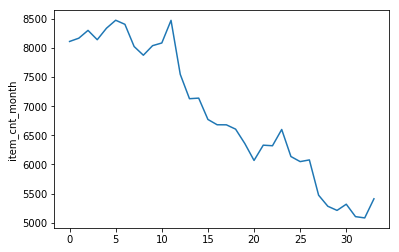

In [51]:
# Number of different items sold each month
itemsdiff_sold_month = train_set.query('item_cnt_month > 0').groupby(['date_block_num', 'item_id'], as_index=True)['item_cnt_month'].sum()
sns.lineplot( range(0,34), itemsdiff_sold_month.groupby('date_block_num', as_index = True).count())

In [52]:
itemsdiff_sold_month.groupby('date_block_num', as_index = True).count()

date_block_num
0     8110
1     8166
2     8300
3     8140
4     8337
5     8474
6     8404
7     8023
8     7874
9     8038
10    8084
11    8472
12    7546
13    7128
14    7138
15    6772
16    6681
17    6680
18    6606
19    6359
20    6069
21    6331
22    6321
23    6600
24    6136
25    6049
26    6078
27    5473
28    5283
29    5212
30    5318
31    5105
32    5083
33    5411
Name: item_cnt_month, dtype: int64

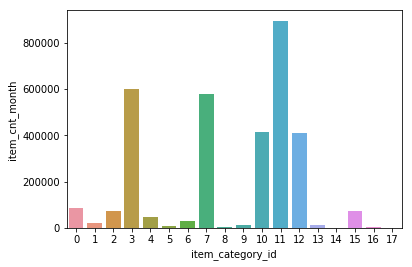

In [53]:
items_sold_category = train_set.groupby('item_category_id', as_index=False)['item_cnt_month'].sum()
sns.barplot( items_sold_category.iloc[:,0], items_sold_category.iloc[:,1])

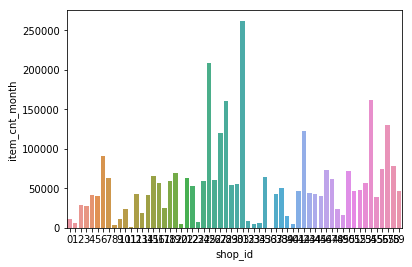

In [54]:
items_sold_shop = train_set.groupby('shop_id', as_index=False)['item_cnt_month'].sum()
sns.barplot( items_sold_shop.iloc[:,0], items_sold_shop.iloc[:,1])

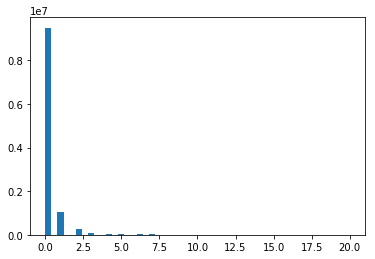

In [55]:
n1 = plt.hist(train_set['item_cnt_month'], bins=50)

In [56]:
print(np.cumsum(n1[0]/train_set['item_cnt_month'].shape[0] * 100))
print(n1[1])

[ 85.50979988  85.50979988  95.06093862  95.06093862  95.06093862
  97.45916372  97.45916372  98.3915335   98.3915335   98.3915335
  98.8734905   98.8734905   99.16214572  99.16214572  99.16214572
  99.34959096  99.34959096  99.47651564  99.47651564  99.47651564
  99.57079689  99.57079689  99.63878678  99.63878678  99.63878678
  99.69325258  99.69325258  99.7336717   99.7336717   99.7336717
  99.76710803  99.76710803  99.79473286  99.79473286  99.79473286
  99.81687058  99.81687058  99.83556645  99.83556645  99.83556645
  99.85134306  99.85134306  99.86554291  99.86554291  99.86554291
  99.87730103  99.87730103  99.88726616  99.88726616 100.        ]
[ 0.   0.4  0.8  1.2  1.6  2.   2.4  2.8  3.2  3.6  4.   4.4  4.8  5.2
  5.6  6.   6.4  6.8  7.2  7.6  8.   8.4  8.8  9.2  9.6 10.  10.4 10.8
 11.2 11.6 12.  12.4 12.8 13.2 13.6 14.  14.4 14.8 15.2 15.6 16.  16.4
 16.8 17.2 17.6 18.  18.4 18.8 19.2 19.6 20. ]


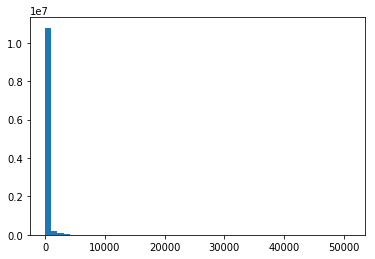

In [57]:
n2 = plt.hist(train_set['item_price_mean'], bins=50)

In [58]:
print(np.cumsum(n2[0]/train_set['item_price_mean'].shape[0] * 100))
print(n2[1])

[ 97.13872101  98.96815918  99.61287386  99.79481395  99.84262132
  99.87032725  99.88195022  99.89417687  99.90519617  99.92101783
  99.93061355  99.93590245  99.94505667  99.96286054  99.97105068
  99.97383479  99.97486194  99.97641167  99.97781724  99.97967331
  99.98217811  99.98365576  99.98807068  99.98954833  99.99159362
  99.99342266  99.99581032  99.99717084  99.99743213  99.99854037
  99.9990179   99.99933326  99.99962158  99.99963059  99.9998198
  99.99986485  99.99990089  99.9999099   99.9999099   99.9999099
  99.99992792  99.99996396  99.99998198  99.99998198  99.99998198
  99.99998198  99.99998198  99.99998198  99.99999099 100.        ]
[    0.    1019.98  2039.96  3059.94  4079.92  5099.9   6119.88  7139.86
  8159.84  9179.82 10199.8  11219.78 12239.76 13259.74 14279.72 15299.7
 16319.68 17339.66 18359.64 19379.62 20399.6  21419.58 22439.56 23459.54
 24479.52 25499.5  26519.48 27539.46 28559.44 29579.42 30599.4  31619.38
 32639.36 33659.34 34679.32 35699.3  36719.28 3773

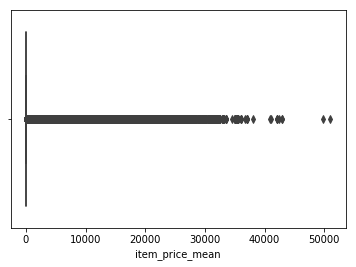

In [59]:
sns.boxplot(train_set['item_price_mean'])

In [60]:
train_set['item_price_mean'].sort_values().iloc[-50:]

10837436    32990.000000
10476309    32990.000000
10216342    32997.500000
8829508     33490.000000
10660473    33490.000000
8750871     33490.000000
8877900     33490.000000
8769018     33490.000000
9573386     34490.000000
8738776     34990.000000
10649667    34990.000000
10703777    34990.000000
10747049    34990.000000
10763282    34990.000000
10730816    34990.000000
10671295    34990.000000
10709172    34990.000000
10871502    34990.000000
10703761    34990.000000
10730832    34990.000000
9394266     35192.000000
9325385     35300.000000
9050056     35300.000000
10064388    35300.000000
10290072    35300.000000
8132589     35300.000000
8799266     35490.000000
8744825     35490.000000
8835560     35490.000000
8890001     35490.000000
9017023     35990.000000
8756921     35990.000000
3783833     35990.000000
10763272    35991.000000
10806560    36657.666667
5849896     36990.000000
3057102     36990.000000
4877577     36990.000000
5559039     36990.000000
10747039    37991.000000


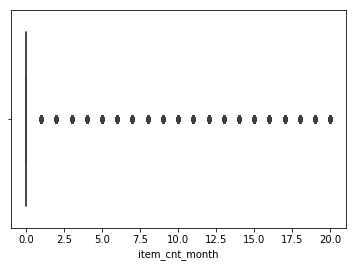

In [61]:
sns.boxplot(train_set['item_cnt_month'])

(array([9.490483e+06, 0.000000e+00, 1.060053e+06, 0.000000e+00,
        2.661720e+05, 0.000000e+00, 1.034810e+05, 0.000000e+00,
        5.349100e+04, 0.000000e+00, 3.203700e+04, 0.000000e+00,
        2.080400e+04, 0.000000e+00, 1.408700e+04, 0.000000e+00,
        1.046400e+04, 0.000000e+00, 7.546000e+03, 0.000000e+00,
        6.045000e+03, 0.000000e+00, 4.486000e+03, 0.000000e+00,
        3.711000e+03, 0.000000e+00, 3.066000e+03, 0.000000e+00,
        2.457000e+03, 0.000000e+00, 2.075000e+03, 0.000000e+00,
        1.751000e+03, 0.000000e+00, 1.576000e+03, 0.000000e+00,
        1.305000e+03, 0.000000e+00, 1.106000e+03, 1.251200e+04]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ]),
 <a list of 40 Patch objects>)

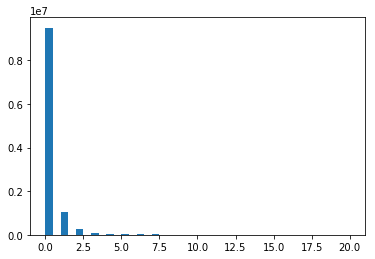

In [62]:
plt.hist(train_set['item_cnt_month'], bins=40)

In [63]:
train_set['item_cnt_month'].sort_values().iloc[-10:]

948587     20.0
6110962    20.0
587305     20.0
948480     20.0
7696065    20.0
4942807    20.0
1074560    20.0
948453     20.0
6110964    20.0
3871582    20.0
Name: item_cnt_month, dtype: float64

### Create date features

In [64]:
train_set['year'] = train_set['date_block_num'].apply(lambda x: 2013 + x//12 )

In [65]:
train_set['month'] = train_set['date_block_num'].apply(lambda x: x % 12)

In [66]:
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
train_set['days'] = train_set['month'].map(days).astype(np.int8)

In [67]:
train_set['December'] = train_set['date_block_num'].apply(lambda x: 1 if (x+1) % 12 == 0 else 0)

In [68]:
#train_set.head(10)

In [69]:
train_set.isna().sum()

date_block_num               0
shop_id                      0
item_id                      0
item_price_mean              0
item_cnt_month               0
transactions                 0
item_price_mean_by_itemid    0
item_cnt_month_by_itemid     0
item_category_id             0
year                         0
month                        0
days                         0
December                     0
dtype: int64

In [70]:
print(train_set[train_set['date_block_num'] == 0].shape)
print(train_set[train_set['date_block_num'] == 1].shape)
print(train_set[train_set['date_block_num'] == 2].shape)
print(train_set[train_set['date_block_num'] == 3].shape)
print(train_set[train_set['date_block_num'] == 4].shape)
print(train_set[train_set['date_block_num'] == 5].shape)
print(train_set[train_set['date_block_num'] == 6].shape)
print(train_set[train_set['date_block_num'] == 7].shape)
print(train_set[train_set['date_block_num'] == 8].shape)
print(train_set[train_set['date_block_num'] == 9].shape)
print(train_set[train_set['date_block_num'] == 10].shape)
print(train_set[train_set['date_block_num'] == 11].shape)
print(train_set[train_set['date_block_num'] == 12].shape)
print(train_set[train_set['date_block_num'] == 31].shape)
print(train_set[train_set['date_block_num'] == 32].shape)
print(train_set[train_set['date_block_num'] == 33].shape)
print(train_set[train_set['date_block_num'] == 34].shape)

(364950, 13)
(375636, 13)
(381800, 13)
(366300, 13)
(375165, 13)
(389804, 13)
(386584, 13)
(361035, 13)
(354330, 13)
(369748, 13)
(363780, 13)
(389712, 13)
(347116, 13)
(214410, 13)
(213486, 13)
(238084, 13)
(214200, 13)


In [71]:
import gc
gc.collect()

12

### Create lag features

In [72]:
def lag_feature(df, lags, col):
    tmp = df[['date_block_num','shop_id','item_id',col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
        del shifted
    del tmp
    return df

In [73]:
# New NaNs are because there are combinations that appear and disappear each month
train_set = lag_feature(train_set, [1,2,3,6,12], 'item_cnt_month')
train_set = lag_feature(train_set, [1,2,3,6,12], 'item_price_mean')
train_set = lag_feature(train_set, [1,2,3,6,12], 'transactions')
train_set = lag_feature(train_set, [1,2,3,6,12], 'item_price_mean_by_itemid')
train_set = lag_feature(train_set, [1,2,3,6,12], 'item_cnt_month_by_itemid')

In [74]:
train_set.isnull().sum()

date_block_num                            0
shop_id                                   0
item_id                                   0
item_price_mean                           0
item_cnt_month                            0
transactions                              0
item_price_mean_by_itemid                 0
item_cnt_month_by_itemid                  0
item_category_id                          0
year                                      0
month                                     0
days                                      0
December                                  0
item_cnt_month_lag_1                2509741
item_cnt_month_lag_2                3164330
item_cnt_month_lag_3                3771749
item_cnt_month_lag_6                5403902
item_cnt_month_lag_12               7981881
item_price_mean_lag_1               2509741
item_price_mean_lag_2               3164330
item_price_mean_lag_3               3771749
item_price_mean_lag_6               5403902
item_price_mean_lag_12          

### Create rolling windows features

In [75]:
train_set['rolling_windows_3'] = train_set.sort_values('date_block_num').groupby(['shop_id','item_id'])['item_cnt_month_lag_1'].apply(lambda x: x.rolling(window=3).mean())

In [76]:
train_set.isnull().sum()

date_block_num                            0
shop_id                                   0
item_id                                   0
item_price_mean                           0
item_cnt_month                            0
transactions                              0
item_price_mean_by_itemid                 0
item_cnt_month_by_itemid                  0
item_category_id                          0
year                                      0
month                                     0
days                                      0
December                                  0
item_cnt_month_lag_1                2509741
item_cnt_month_lag_2                3164330
item_cnt_month_lag_3                3771749
item_cnt_month_lag_6                5403902
item_cnt_month_lag_12               7981881
item_price_mean_lag_1               2509741
item_price_mean_lag_2               3164330
item_price_mean_lag_3               3771749
item_price_mean_lag_6               5403902
item_price_mean_lag_12          

In [77]:
train_set.fillna(0, inplace=True)

In [78]:
train_set.shape

(11098708, 39)

In [79]:
# We need to drop these columns as we don't have access to this information when doing the predictions
train_set.drop(['item_price_mean', 'transactions', 'item_price_mean_by_itemid', 'item_cnt_month_by_itemid'],\
              axis=1, inplace=True)

In [80]:
print(train_set.shape)
train_set.head()

(11098708, 35)


,date_block_num,shop_id,item_id,item_cnt_month,item_category_id,year,month,days,December,item_cnt_month_lag_1,...,item_price_mean_by_itemid_lag_2,item_price_mean_by_itemid_lag_3,item_price_mean_by_itemid_lag_6,item_price_mean_by_itemid_lag_12,item_cnt_month_by_itemid_lag_1,item_cnt_month_by_itemid_lag_2,item_cnt_month_by_itemid_lag_3,item_cnt_month_by_itemid_lag_6,item_cnt_month_by_itemid_lag_12,rolling_windows_3
0,0,0,19,0.0,11,2013,0,31,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,27,0.0,7,2013,0,31,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,28,0.0,3,2013,0,31,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,29,0.0,7,2013,0,31,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,32,6.0,11,2013,0,31,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
import gc
gc.collect()

14

### Mean encoding with time dimension

In [82]:
# Mean encoding with a time dimension (need only lags of these)
# Need to do this before the split in order to get lags for validation and test sets
if True:
    # ME for 'date_block_num'
    ME_dbn = train_set.groupby(['date_block_num']).agg({'item_cnt_month':'mean'})
    ME_dbn.columns = ['ME_dbn']
    ME_dbn.reset_index(inplace=True)

    train_set      = train_set.merge(ME_dbn, on=['date_block_num'], how='left')
    del ME_dbn
    
    # ME for 'date_block_num','item_id'
    ME_dbn_itemid = train_set.groupby(['date_block_num','item_id']).agg({'item_cnt_month':'mean'})
    ME_dbn_itemid.columns = ['ME_dbn_itemid']
    ME_dbn_itemid.reset_index(inplace=True)

    train_set      = train_set.merge(ME_dbn_itemid, on=['date_block_num','item_id'], how='left')
    del ME_dbn_itemid

    # ME for 'date_block_num','shop_id'
    ME_dbn_shopid = train_set.groupby(['date_block_num','shop_id']).agg({'item_cnt_month':'mean'})
    ME_dbn_shopid.columns = ['ME_dbn_shopid']
    ME_dbn_shopid.reset_index(inplace=True)

    train_set      = train_set.merge(ME_dbn_shopid, on=['date_block_num','shop_id'], how='left')
    del ME_dbn_shopid

    # ME for 'date_block_num','item_category_id'
    ME_dbn_categoryid = train_set.groupby(['date_block_num','item_category_id']).agg({'item_cnt_month':'mean'})
    ME_dbn_categoryid.columns = ['ME_dbn_categoryid']
    ME_dbn_categoryid.reset_index(inplace=True)

    train_set      = train_set.merge(ME_dbn_categoryid, on=['date_block_num','item_category_id'], how='left')
    del ME_dbn_categoryid

    # ME for 'date_block_num','shop_id', 'item_category_id'
    ME_dbn_shopid_categoryid = train_set.groupby(['date_block_num','shop_id', 'item_category_id']).agg({'item_cnt_month':'mean'})
    ME_dbn_shopid_categoryid.columns = ['ME_dbn_shopid_categoryid']
    ME_dbn_shopid_categoryid.reset_index(inplace=True)

    train_set      = train_set.merge(ME_dbn_shopid_categoryid, on=['date_block_num','shop_id', 'item_category_id'], how='left')
    del ME_dbn_shopid_categoryid

    # Take the lags and drop
    train_set = lag_feature(train_set, [1], 'ME_dbn')
    train_set = lag_feature(train_set, [1,2,3,6,12], 'ME_dbn_itemid')
    train_set = lag_feature(train_set, [1,2,3,6,12], 'ME_dbn_shopid')
    train_set = lag_feature(train_set, [1], 'ME_dbn_categoryid')
    train_set = lag_feature(train_set, [1], 'ME_dbn_shopid_categoryid')

    train_set.drop(['ME_dbn','ME_dbn_itemid', 'ME_dbn_shopid', 'ME_dbn_categoryid', 'ME_dbn_shopid_categoryid'], axis=1, inplace=True)

### Text features

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
if False:
    items_subset = items[['item_id', 'item_name']]
    tfidf = TfidfVectorizer(max_features = 30)
    items_tfidf = pd.DataFrame(tfidf.fit_transform(items_subset['item_name']).toarray(), columns=tfidf.get_feature_names())

    items_subset = pd.concat([items_subset, items_tfidf], axis=1)
    items_subset.drop('item_name', axis = 1, inplace = True)
    train_set = train_set.merge(items_subset, on = 'item_id', how = 'left')
    train_set.head()

In [84]:
train_set.fillna(0, inplace=True)

### Save the full dataset

In [85]:
# Give the file a less misleading name!
train_set.to_pickle('full_set.pkl')
#train_set.to_pickle('full_set_with_MEF.pkl')

### Load data for modeling

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import mean_squared_error
import pickle

full_set = pd.read_pickle('full_set.pkl')
#full_set = pd.read_pickle('full_set_with_MEF.pkl')
print(full_set.shape)

(11098708, 48)


In [87]:
full_set_features = full_set.drop('item_cnt_month', axis=1)

In [88]:
full_set.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month',
       'item_category_id', 'year', 'month', 'days', 'December',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12',
       'item_price_mean_lag_1', 'item_price_mean_lag_2',
       'item_price_mean_lag_3', 'item_price_mean_lag_6',
       'item_price_mean_lag_12', 'transactions_lag_1', 'transactions_lag_2',
       'transactions_lag_3', 'transactions_lag_6', 'transactions_lag_12',
       'item_price_mean_by_itemid_lag_1', 'item_price_mean_by_itemid_lag_2',
       'item_price_mean_by_itemid_lag_3', 'item_price_mean_by_itemid_lag_6',
       'item_price_mean_by_itemid_lag_12', 'item_cnt_month_by_itemid_lag_1',
       'item_cnt_month_by_itemid_lag_2', 'item_cnt_month_by_itemid_lag_3',
       'item_cnt_month_by_itemid_lag_6', 'item_cnt_month_by_itemid_lag_12',
       'rolling_windows_3', 'ME_dbn_lag_1', 'ME_dbn_itemid_lag_1',
       'ME_dbn_itemid_

### Create X_test, X_train, y_train, X_validation, y_validation

In [89]:
# The train/test split is done timewise (i.e. a date serves as a cutoff), so we will do the same for our train/validation split
# in order to mimic the train/test split

In [90]:
X_test = full_set_features.query('date_block_num == 34')

In [91]:
X_train = full_set_features.query( 'date_block_num >= 12 & date_block_num <= 32')
#X_train = full_set_features.query( 'date_block_num >= 12 & date_block_num <= 32 & date_block_num != 11 & date_block_num != 23') #'date_block_num >= 12 &
y_train = full_set.query('date_block_num >= 12 & date_block_num <= 32')['item_cnt_month'] #date_block_num >= 12 &
#y_train = full_set.query('date_block_num >= 12 & date_block_num <= 32 & date_block_num != 11 & date_block_num != 23')['item_cnt_month']

In [92]:
X_train.shape

(6167580, 47)

In [93]:
X_validation = full_set_features.query('date_block_num == 33')
y_validation = full_set.query('date_block_num == 33')['item_cnt_month']

In [94]:
X_train.reset_index(drop=True, inplace=True)
X_validation.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

### Created mean encoded features

In [95]:
# Set to estimate mean encoding (target encoding)
ME_set = full_set.query( 'date_block_num >= 12 & date_block_num <= 32')# for training models
ME_set.reset_index(drop=True, inplace=True)

In [96]:
if True:
    # ME without regularization, should be done after the data split
    pd.options.mode.chained_assignment = None
    global_mean = ME_set['item_cnt_month'].mean()

    # ME for 'shop_id' ------------------
    ME_shopid = ME_set.groupby(['shop_id'])['item_cnt_month'].mean()

    X_train['ME_shopid'] = X_train['shop_id'].map(ME_shopid)
    X_validation['ME_shopid'] = X_validation['shop_id'].map(ME_shopid)
    X_test['ME_shopid'] = X_test['shop_id'].map(ME_shopid)

    # ME for 'item_id' ------------------
    #ME_itemid = ME_set.groupby(['item_id'])['item_cnt_month'].mean()

    #X_train['ME_itemid'] = X_train['item_id'].map(ME_itemid)
    #X_validation['ME_itemid'] = X_validation['item_id'].map(ME_itemid)
    #X_test['ME_itemid'] = X_test['item_id'].map(ME_itemid)

    # ME for 'item_category_id' ------------------
    ME_categoryid = ME_set.groupby(['item_category_id'])['item_cnt_month'].mean()

    X_train['ME_categoryid'] = X_train['item_category_id'].map(ME_categoryid)
    X_validation['ME_categoryid'] = X_validation['item_category_id'].map(ME_categoryid)
    X_test['ME_categoryid'] = X_test['item_category_id'].map(ME_categoryid)

    X_train.fillna(global_mean, inplace=True)
    X_validation.fillna(global_mean, inplace=True)
    X_test.fillna(global_mean, inplace=True)
    
    # Mean encoding with regularization (cross-validation scheme), it regularizes the training part only

    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 5, shuffle = True)
    
    # ME for 'shop_id' ------------------
    for tr_ind, val_ind in kf.split(X_train):
        X_tr, X_val = ME_set.iloc[tr_ind], ME_set.iloc[val_ind]
        ME_shopid = X_tr.groupby(['shop_id'])['item_cnt_month'].mean()
        ME_set.loc[val_ind, 'ME_shopid'] = X_val['shop_id'].map( ME_shopid )
    
    ME_set['ME_shopid'].fillna(global_mean, inplace=True)
    X_train['ME_shopid'] = ME_set['ME_shopid']
        
    # ME for 'item_id' ------------------
    #for tr_ind, val_ind in kf.split(ME_set):
    #    X_tr, X_val = ME_set.iloc[tr_ind], ME_set.iloc[val_ind]
    #    ME_itemid = X_tr.groupby(['item_id'])['item_cnt_month'].mean()
    #    ME_set.loc[val_ind, 'ME_itemid'] = X_val['item_id'].map( ME_itemid )
        
    #ME_set['ME_itemid'].fillna(global_mean, inplace=True)
    #X_train['ME_itemid'] = ME_set['ME_itemid']
        
    # ME for 'item_category_id' ------------------
    for tr_ind, val_ind in kf.split(ME_set):
        X_tr, X_val = ME_set.iloc[tr_ind], ME_set.iloc[val_ind]
        ME_categoryid = X_tr.groupby(['item_category_id'])['item_cnt_month'].mean()
        ME_set.loc[val_ind, 'ME_categoryid'] = X_val['item_category_id'].map( ME_categoryid )
    
    ME_set['ME_categoryid'].fillna(global_mean, inplace=True)
    X_train['ME_categoryid'] = ME_set['ME_categoryid']

In [97]:
if False:
    # ME with multiple groupby without regularization
    # ME for 'item_category_id','item_id'
    ME_categoryid_itemid = ME_set.groupby(['item_category_id','item_id']).agg({'item_cnt_month':'mean'})
    ME_categoryid_itemid.columns = ['ME_categoryid_itemid'] 
    ME_categoryid_itemid.reset_index(inplace=True)

    X_train      = X_train.merge(ME_categoryid_itemid, on=['item_category_id', 'item_id'], how='left')
    X_validation = X_validation.merge(ME_categoryid_itemid, on=['item_category_id', 'item_id'], how='left')
    X_test       = X_test.merge(ME_categoryid_itemid, on=['item_category_id', 'item_id'], how='left')

    # ME for 'shop_id','item_category_id'
    ME_shopid_categoryid = ME_set.groupby(['shop_id','item_category_id']).agg({'item_cnt_month':'mean'})
    ME_shopid_categoryid.columns = ['ME_shopid_categoryid']
    ME_shopid_categoryid.reset_index(inplace=True)

    X_train      = X_train.merge(ME_shopid_categoryid, on=['shop_id','item_category_id'], how='left')
    X_validation = X_validation.merge(ME_shopid_categoryid, on=['shop_id','item_category_id'], how='left')
    X_test       = X_test.merge(ME_shopid_categoryid, on=['shop_id','item_category_id'], how='left')

    X_train.fillna(global_mean, inplace=True)
    X_validation.fillna(global_mean, inplace=True)
    X_test.fillna(global_mean, inplace=True)
    
    # ME with multiple groupby with regularization (cross-validation scheme)
    # ME for 'item_category_id','item_id'
    for tr_ind, val_ind in kf.split(ME_set):
        X_tr, X_val = ME_set.iloc[tr_ind], ME_set.iloc[val_ind]
        ME_categoryid_itemid = ME_set.groupby(['item_category_id','item_id']).agg({'item_cnt_month':'mean'})
        ME_categoryid_itemid.columns = ['ME_categoryid_itemid_temp'] 
        ME_categoryid_itemid.reset_index(inplace=True)
        ME_set_temp = ME_set.loc[val_ind].merge(ME_categoryid_itemid, on=['item_category_id', 'item_id'], how='left')
        ME_set.loc[val_ind, 'ME_categoryid_itemid'] = ME_set_temp[ 'ME_categoryid_itemid_temp']
    
    ME_set['ME_categoryid_itemid'].fillna(global_mean, inplace=True)
    X_train['ME_categoryid_itemid'] = ME_set['ME_categoryid_itemid']
    
    # ME for 'shop_id','item_category_id'
    for tr_ind, val_ind in kf.split(ME_set):
        X_tr, X_val = ME_set.iloc[tr_ind], ME_set.iloc[val_ind]
        ME_shopid_categoryid = ME_set.groupby(['shop_id','item_category_id']).agg({'item_cnt_month':'mean'})
        ME_shopid_categoryid.columns = ['ME_shopid_categoryid_temp'] 
        ME_shopid_categoryid.reset_index(inplace=True)
        ME_set_temp = ME_set.loc[val_ind].merge(ME_shopid_categoryid, on=['shop_id','item_category_id'], how='left')
        ME_set.loc[val_ind, 'ME_shopid_categoryid'] = ME_set_temp['ME_shopid_categoryid_temp']
    
    ME_set['ME_shopid_categoryid'].fillna(global_mean, inplace=True)
    X_train['ME_shopid_categoryid'] = ME_set['ME_shopid_categoryid']


In [98]:
del ME_shopid
del ME_categoryid
del ME_set
X_train.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'year',
       'month', 'days', 'December', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_3', 'item_cnt_month_lag_6',
       'item_cnt_month_lag_12', 'item_price_mean_lag_1',
       'item_price_mean_lag_2', 'item_price_mean_lag_3',
       'item_price_mean_lag_6', 'item_price_mean_lag_12', 'transactions_lag_1',
       'transactions_lag_2', 'transactions_lag_3', 'transactions_lag_6',
       'transactions_lag_12', 'item_price_mean_by_itemid_lag_1',
       'item_price_mean_by_itemid_lag_2', 'item_price_mean_by_itemid_lag_3',
       'item_price_mean_by_itemid_lag_6', 'item_price_mean_by_itemid_lag_12',
       'item_cnt_month_by_itemid_lag_1', 'item_cnt_month_by_itemid_lag_2',
       'item_cnt_month_by_itemid_lag_3', 'item_cnt_month_by_itemid_lag_6',
       'item_cnt_month_by_itemid_lag_12', 'rolling_windows_3', 'ME_dbn_lag_1',
       'ME_dbn_itemid_lag_1', 'ME_dbn_itemid_lag_2', 'ME_dbn_itemid_la

### PCA

In [99]:
if False:
    from sklearn import decomposition

    pca = decomposition.PCA(n_components=full_set.shape[1]-1)#n_components=full_set.shape[1]-1
    pca.fit(full_set_features)

    print(pca.explained_variance_ratio_ / np.sum(pca.explained_variance_ratio_) * 100) 

    # Apply PCA transform
    X_test = pca.transform(X_test)
    X_train = pca.transform(X_train)
    X_validation = pca.transform(X_validation)

    # Select the important PCA features
    X_train = X_train[:,0:3]
    X_validation = X_validation[:,0:3]
    X_test = X_test[:,0:3]

### Feature selection

In [100]:
if False:
    # Recursive Feature Elimination
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import RFECV
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor

    # create a base classifier used to evaluate a subset of attributes
    model = LinearRegression()
    #model = DecisionTreeRegressor()

    # create the RFE model and select # of attributes
    rfe = RFE(model, 45)
    rfe = rfe.fit(X_train, y_train)

    # summarize the selection of the attributes
    print(rfe.support_)
    print(rfe.ranking_)
    print(X_train.columns[rfe.support_])

    # create the RFE model and select # of attributes
    #rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring= 'neg_mean_squared_error', n_jobs=-1)
    #rfecv.fit(X, y)
    
    #print(X.columns[rfecv.support_])
    #print("Optimal number of features : %d" % rfecv.n_features_)
    
    # Plot number of features VS. cross-validation scores
    #plt.figure()
    #plt.xlabel("Number of features selected")
    #plt.ylabel("Cross validation score (nb of correct classifications)")
    #plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    #plt.show()

    X_train = X_train[X_train.columns[rfe.support_]]
    X_validation = X_validation[X_train.columns]
    X_test = X_test[X_train.columns]

### XGBoost model

[15:28:40] Tree method is automatically selected to be 'approx' for faster speed. to use old behavior(exact greedy algorithm on single machine), set tree_method to 'exact'
[0]	validation_0-rmse:1.15696	validation_1-rmse:1.12378
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.11274	validation_1-rmse:1.09219
[2]	validation_0-rmse:1.07444	validation_1-rmse:1.06516
[3]	validation_0-rmse:1.04222	validation_1-rmse:1.04369
[4]	validation_0-rmse:1.0148	validation_1-rmse:1.02536
[5]	validation_0-rmse:0.991314	validation_1-rmse:1.00951
[6]	validation_0-rmse:0.971508	validation_1-rmse:0.996617
[7]	validation_0-rmse:0.954402	validation_1-rmse:0.985908
[8]	validation_0-rmse:0.939963	validation_1-rmse:0.97752
[9]	validation_0-rmse:0.927796	validation_1-rmse:0.969755
[10]	validation_0-rmse:0.917694	validation_1-rmse:0.96376
[11]	validation_0-rmse:0.908282	validation_1

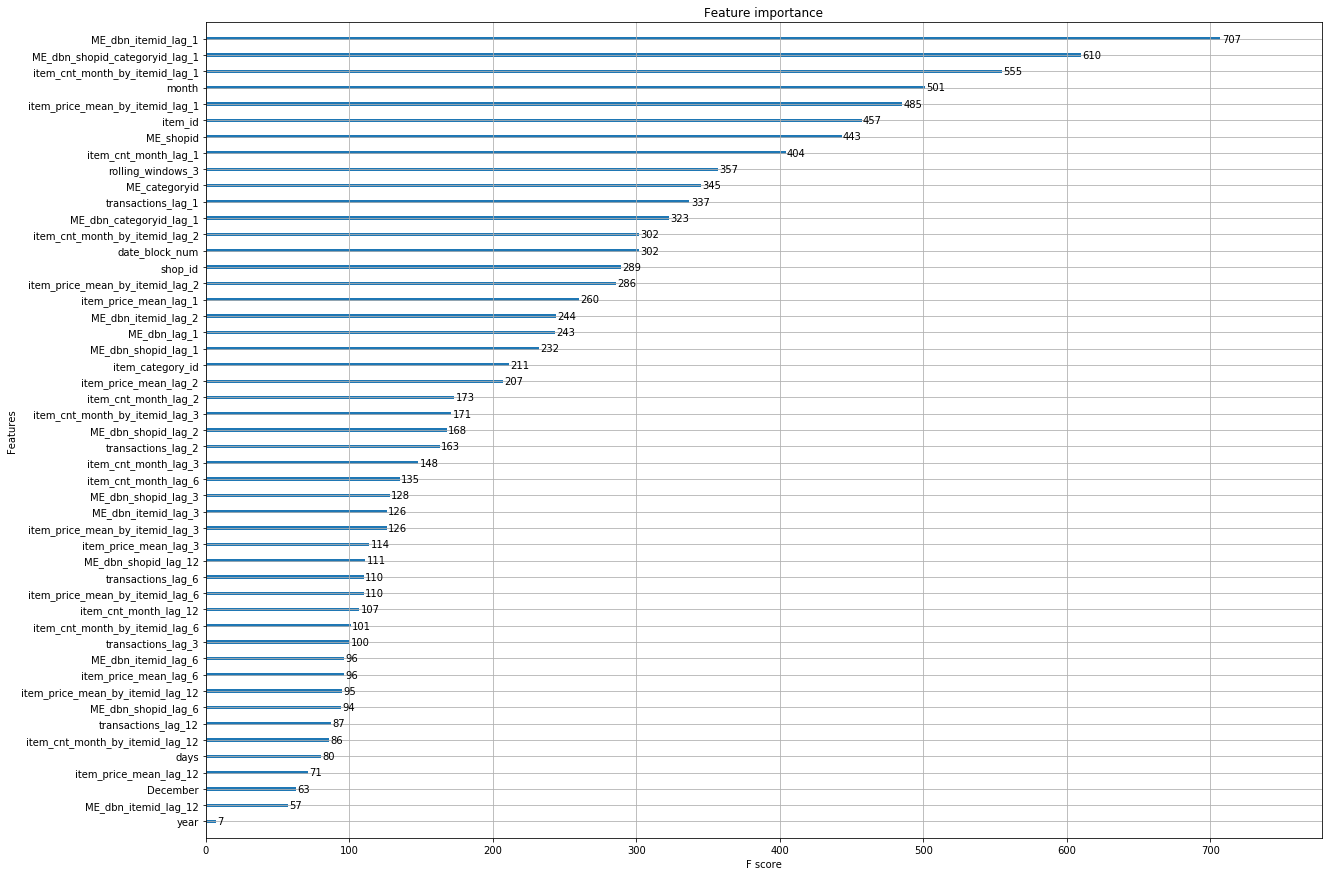

In [101]:
# Put False if model is already trained
if True:
    from xgboost import XGBRegressor
    from xgboost import plot_importance

    xgb_model = XGBRegressor(max_depth=8, 
                             n_estimators=1000, 
                             min_child_weight=0.5,  
                             colsample_bytree=0.8, 
                             subsample=0.8, 
                             eta=0.3, 
                             seed=42#,
                             #reg_lambda = 1
                             )
    xgb_model.fit(X_train, y_train, 
                  eval_metric = "rmse", 
                  eval_set = [(X_train, y_train), (X_validation, y_validation)], 
                  verbose = True, 
                  early_stopping_rounds = 10)

    plt.rcParams["figure.figsize"] = (20, 15)
    plot_importance(xgb_model)
    plt.show()

    # Serialize model
    from joblib import dump, load
    dump(xgb_model, 'xgb_model.joblib')


In [102]:
if True:
    xgb_model = load('xgb_model.joblib') 
    
    xgb_train_pred = xgb_model.predict(X_train)
    xgb_val_pred = xgb_model.predict(X_validation)
    xgb_test_pred = xgb_model.predict(X_test)

    pickle.dump(xgb_val_pred, open('xgb_val_pred.pickle', 'wb'))
    pickle.dump(xgb_test_pred, open('xgb_test_pred.pickle', 'wb'))
    
    print('Train rmse:', np.sqrt(mean_squared_error(y_train, xgb_train_pred)))
    print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, xgb_val_pred)))

Train rmse: 0.8404906692280136
Validation rmse: 0.9348128956784616


### Catboost model

0:	learn: 1.2108941	test: 1.1555655	best: 1.1555655 (0)	total: 1.4s	remaining: 23m 23s
10:	learn: 1.0922199	test: 1.0749463	best: 1.0749463 (10)	total: 14s	remaining: 20m 55s
20:	learn: 1.0182071	test: 1.0254040	best: 1.0254040 (20)	total: 26.2s	remaining: 20m 19s
30:	learn: 0.9724097	test: 0.9964823	best: 0.9964823 (30)	total: 38.8s	remaining: 20m 12s
40:	learn: 0.9440687	test: 0.9788912	best: 0.9788912 (40)	total: 51.2s	remaining: 19m 56s
50:	learn: 0.9256620	test: 0.9672830	best: 0.9672830 (50)	total: 1m 4s	remaining: 19m 55s
60:	learn: 0.9134533	test: 0.9596953	best: 0.9596953 (60)	total: 1m 18s	remaining: 20m 5s
70:	learn: 0.9048202	test: 0.9545378	best: 0.9545378 (70)	total: 1m 32s	remaining: 20m 8s
80:	learn: 0.8983859	test: 0.9511065	best: 0.9511065 (80)	total: 1m 46s	remaining: 20m 11s
90:	learn: 0.8936663	test: 0.9487311	best: 0.9487311 (90)	total: 2m	remaining: 20m 7s
100:	learn: 0.8899197	test: 0.9469616	best: 0.9469616 (100)	total: 2m 15s	remaining: 20m 3s
110:	learn: 0.88

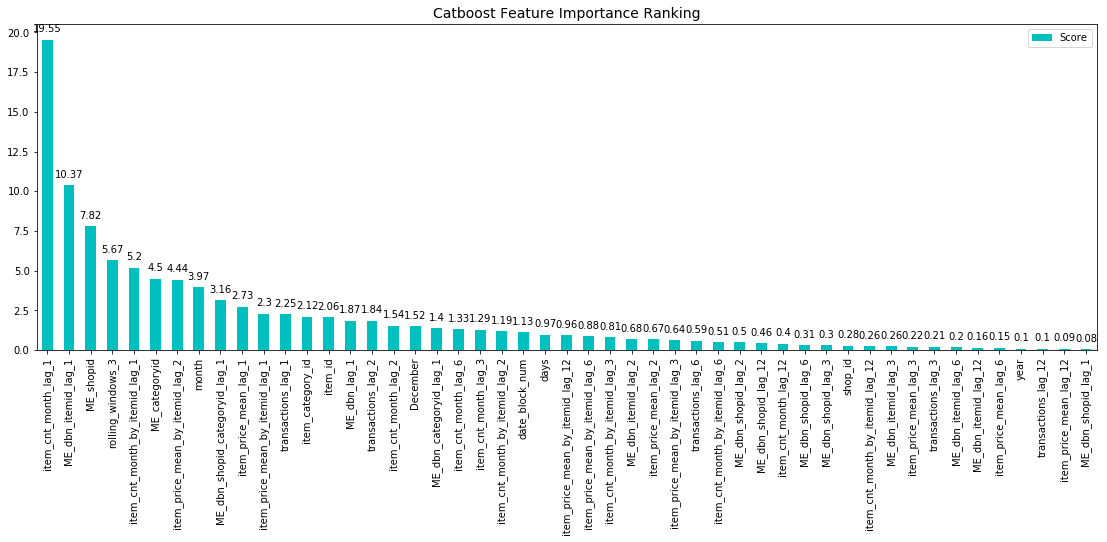

In [103]:
if True:
    import catboost
    from catboost import Pool
    from catboost import CatBoostRegressor

    #cat_features = [1, 2, 7, 8, 9]

    catboost_model = CatBoostRegressor(
        iterations=1000,
        max_ctr_complexity=4,
        #learning_rate = ,
        #custom_loss = ,
        random_seed=42,
        od_type='Iter',
        od_wait=25,
        verbose=10,
        depth=8 #,
        #l2_leaf_reg = 1
    )

    catboost_model.fit(
        X_train, y_train,
        #cat_features=cat_features,
        eval_set=(X_validation, y_validation)#,
        #logging_level='Silent',
        #plot=True
    )

    # Plot features importance
    feature_score = pd.DataFrame(list(zip(X_train.dtypes.index, catboost_model.get_feature_importance(Pool(X_train, label=y_train)))), columns=['Feature','Score'])
    feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

    plt.rcParams["figure.figsize"] = (19, 6)
    ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
    ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
    ax.set_xlabel('')
    rects = ax.patches
    labels = feature_score['Score'].round(2)

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

    plt.show()

    # Serialize model
    from joblib import dump, load
    dump(catboost_model, 'catboost_model.joblib')
    

In [104]:
if True:
    catboost_model = load('catboost_model.joblib') 
    
    # Preds
    catboost_train_pred = catboost_model.predict(X_train)
    catboost_val_pred = catboost_model.predict(X_validation)
    catboost_test_pred = catboost_model.predict(X_test)

    pickle.dump(catboost_val_pred, open('catboost_val_pred.pickle', 'wb'))
    pickle.dump(catboost_test_pred, open('catboost_test_pred.pickle', 'wb'))

    print('Train rmse:', np.sqrt(mean_squared_error(y_train, catboost_train_pred)))
    print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, catboost_val_pred)))

Train rmse: 0.846166639452477
Validation rmse: 0.936311581200749


### Random Forest Regressor

In [105]:
if True:
    from sklearn.ensemble import RandomForestRegressor

    rf_model = RandomForestRegressor(n_estimators=60,
                                     max_depth=8,
                                     verbose=1,
                                     n_jobs=-1
                                    )

    rf_model.fit(X_train, y_train)
    
    # Serialize model
    from joblib import dump, load
    dump(rf_model, 'rf_model.joblib')


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 23.2min finished


In [106]:
if True:
    rf_model = load('rf_model.joblib') 
    
    # Preds
    rf_train_pred = rf_model.predict(X_train)
    rf_val_pred = rf_model.predict(X_validation)
    rf_test_pred = rf_model.predict(X_test)
    
    pickle.dump(rf_val_pred, open('rf_val_pred.pickle', 'wb'))
    pickle.dump(rf_test_pred, open('rf_test_pred.pickle', 'wb'))

    print('Train rmse:', np.sqrt(mean_squared_error(y_train, rf_train_pred)))
    print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, rf_val_pred)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:    5.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Train rmse: 0.8868044718973028
Validation rmse: 0.949670437439077


[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:    0.1s finished


### Normalize inputs

In [107]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.fit_transform(X_validation)
X_test_scaled = scaler.fit_transform(X_test)

### Linear Regression

In [108]:
if False:
    from sklearn.linear_model import LinearRegression

    lr_model = LinearRegression()

    lr_model.fit(X_train_scaled, y_train)

    lr_train_pred = lr_model.predict(X_train_scaled)
    lr_val_pred = lr_model.predict(X_validation_scaled)
    lr_test_pred = lr_model.predict(X_test_scaled)

    print('Train rmse:', np.sqrt(mean_squared_error(y_train, lr_train_pred)))
    print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, lr_val_pred)))

### KNN model

In [109]:
if False:
    from sklearn.neighbors import KNeighborsRegressor

    knn_model = KNeighborsRegressor(n_neighbors = 5, n_jobs=-1)

    knn_model.fit(X_train_scaled[0:1000000], y_train[0:1000000])

    knn_train_pred = knn_model.predict(X_train_scaled)
    knn_val_pred = knn_model.predict(X_validation_scaled)
    knn_test_pred = knn_model.predict(X_test_scaled)

    print('Train rmse:', np.sqrt(mean_squared_error(y_train, knn_train_pred)))
    print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, knn_val_pred)))

### SVR Model

In [110]:
if False:
    from sklearn.svm import SVR

    svr_model = SVR()

    svr_model.fit(X_train_scaled, y_train)

    svr_train_pred = svr_model.predict(X_train_scaled)
    svr_val_pred = svr_model.predict(X_validation_scaled)
    svr_test_pred = svr_model.predict(X_test_scaled)

    print('Train rmse:', np.sqrt(mean_squared_error(y_train, svr_train_pred)))
    print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, svr_val_pred)))

### MLP model

In [111]:
if False:
    import keras
    from keras.models import Sequential
    from keras.layers import Dense, Activation, Dropout
    from keras.layers import regularizers
    from keras.layers.advanced_activations import LeakyReLU

    es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0,
                                  patience=2,
                                  verbose=0, mode='auto')

    mlp_model = Sequential([
        Dense(128, input_shape=(X_train_scaled.shape[1],)),
       Activation('relu'),
        Dropout(0.25),
        Dense(64,  kernel_regularizer=regularizers.l2(0.2)),
        Activation('relu'),
        Dropout(0.25),
        Dense(32, kernel_regularizer=regularizers.l2(0.2)),
        Activation('relu'),
        Dropout(0.25),
        Dense(16, kernel_regularizer=regularizers.l2(0.2)),
        Activation('relu'),
        Dropout(0.25),
        Dense(8, kernel_regularizer=regularizers.l2(0.2)),
        Activation('relu'),
        Dense(1)
    ])

    mlp_model.compile(optimizer='rmsprop',
                  loss='mse')

    mlp_model.fit(X_train_scaled, y_train, epochs=8, batch_size=64,verbose=1, callbacks= [es],
                validation_data=(X_validation_scaled,y_validation))

    mlp_train_pred = mlp_model.predict(X_train_scaled)
    mlp_val_pred = mlp_model.predict(X_validation_scaled)
    mlp_test_pred = mlp_model.predict(X_test_scaled)

    print('Train rmse:', np.sqrt(mean_squared_error(y_train, mlp_train_pred)))
    print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, mlp_val_pred)))

### LSTM model

In [112]:
if False:
    import keras
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    from keras.layers import LSTM
    from keras.layers import regularizers

    X_train_lstm = np.expand_dims(X_train_scaled, axis=2)
    y_train_lstm = y_train
    X_validation_lstm = np.expand_dims(X_validation_scaled, axis=2)
    y_validation_lstm = y_validation
    X_test_lstm = np.expand_dims(X_test_scaled, axis=2)

    print(X_train_lstm.shape, y_train_lstm.shape, X_validation.shape, y_validation.shape, X_test_lstm.shape)

    lstm_model = Sequential()
    lstm_model.add(LSTM(units=64, input_shape=(X_train_lstm.shape[1],1), kernel_regularizer=regularizers.l2(0.25)))
    lstm_model.add(Dropout(0.25))
    lstm_model.add(Dense(1))

    lstm_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mean_squared_error'])
    lstm_model.summary()

    es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0,
                                  patience=2,
                                  verbose=0, mode='auto')

    lstm_model.fit(X_train_lstm, y_train_lstm, batch_size=4096, epochs=2, verbose=1, callbacks= [es], validation_data=(X_validation_lstm,y_validation_lstm) )

    lstm_train_pred = lstm_model.predict(X_train_lstm)
    lstm_val_pred = lstm_model.predict(X_validation_lstm)
    lstm_test_pred = lstm_model.predict(X_test_lstm)

    print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
    print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, lstm_val_pred)))

### Ensembling

In [113]:
catboost_val_pred = pickle.load(open( 'catboost_val_pred.pickle', "rb" ))
xgb_val_pred = pickle.load(open( 'xgb_val_pred.pickle', "rb" ))
rf_val_pred = pickle.load(open( 'rf_val_pred.pickle', "rb" ))
catboost_test_pred = pickle.load(open( 'catboost_test_pred.pickle', "rb" ))
xgb_test_pred = pickle.load(open( 'xgb_test_pred.pickle', "rb" ))
rf_test_pred = pickle.load(open( 'rf_test_pred.pickle', "rb" ))

In [114]:
ensemble_validation = pd.DataFrame()
ensemble_validation['CatBoost'] = catboost_val_pred
ensemble_validation['XGBoost'] = xgb_val_pred
ensemble_validation['RandomForest'] = rf_val_pred
#ensemble_validation['LinearRegression'] = lr_val_pred
#ensemble_validation['MLP'] = mlp_val_pred
#ensemble_validation['LSTM'] = lstm_val_pred

In [115]:
ensemble_test = pd.DataFrame()
ensemble_test['CatBoost'] = catboost_test_pred
ensemble_test['XGBoost'] = xgb_test_pred
ensemble_test['RandomForest'] = rf_test_pred
#ensemble_test['LinearRegression'] = lr_test_pred
#ensemble_test['MLP'] = mlp_test_pred
#ensemble_test['LSTM'] = lstm_test_pred

In [116]:
from sklearn.linear_model import LinearRegression

ensemble_lr_model = LinearRegression()
ensemble_lr_model.fit(ensemble_validation, y_validation)

ensemble_validation_pred = ensemble_lr_model.predict(ensemble_validation)
ensemble_test_pred = ensemble_lr_model.predict(ensemble_test)

print('Ensemble validation rmse:', np.sqrt(mean_squared_error(y_validation, ensemble_validation_pred)))

Ensemble validation rmse: 0.9325213931505593


### Create the submission file

In [117]:
final_predictions = pd.DataFrame(X_test['shop_id'], columns=['shop_id'])
final_predictions['item_id'] = X_test['item_id']

final_predictions['item_cnt_month'] = ensemble_test_pred.clip(0., 20.)
#final_predictions['item_cnt_month'] = catboost_test_pred.clip(0., 20.)
#final_predictions['item_cnt_month'] = xgb_test_pred.clip(0., 20.)

print(final_predictions.mean())
final_predictions.head(10)

shop_id              31.642857
item_id           11019.398627
item_cnt_month        0.284471
dtype: float64


,shop_id,item_id,item_cnt_month
0,5,5037,0.515891
1,5,5320,0.153548
2,5,5233,0.958344
3,5,5232,0.369476
4,5,5268,1.056364
5,5,5039,0.601709
6,5,5041,0.756502
7,5,5046,0.114527
8,5,5319,0.897483
9,5,5003,0.686139


In [118]:
submissions = pd.merge(test_set, final_predictions, on=['shop_id', 'item_id'], how='left')
submissions['ID'] = test_set.index
submissions.head(10)

,shop_id,item_id,date_block_num,item_cnt_month,ID
0,5,5037,34,0.515891,0
1,5,5320,34,0.153548,1
2,5,5233,34,0.958344,2
3,5,5232,34,0.369476,3
4,5,5268,34,1.056364,4
5,5,5039,34,0.601709,5
6,5,5041,34,0.756502,6
7,5,5046,34,0.114527,7
8,5,5319,34,0.897483,8
9,5,5003,34,0.686139,9


In [119]:
#submissions.fillna(submissions['item_cnt_month'].mean(), inplace=True)
#submissions.drop(['shop_id', 'item_id', 'date_block_num'], axis=1, inplace=True)
submissions = submissions[['ID', 'item_cnt_month']]
submissions.head(10)

,ID,item_cnt_month
0,0,0.515891
1,1,0.153548
2,2,0.958344
3,3,0.369476
4,4,1.056364
5,5,0.601709
6,6,0.756502
7,7,0.114527
8,8,0.897483
9,9,0.686139


In [120]:
submissions.shape

(214200, 2)

In [121]:
submissions.isna().sum()

ID                0
item_cnt_month    0
dtype: int64

In [122]:
#submissions = submissions.round()
#submissions.astype('int')

In [123]:
submissions.to_csv('submission.csv', index=False)

### Results exploration

In [124]:
np.sum(final_predictions['item_cnt_month'])


60933.62510097401

In [125]:
np.sum(submissions['item_cnt_month'])

60933.62510097401

In [126]:
final_predictions['item_cnt_month'].describe()

count    214200.000000
mean          0.284471
std           0.686144
min           0.000000
25%           0.046936
50%           0.123860
75%           0.278137
max          19.095356
Name: item_cnt_month, dtype: float64

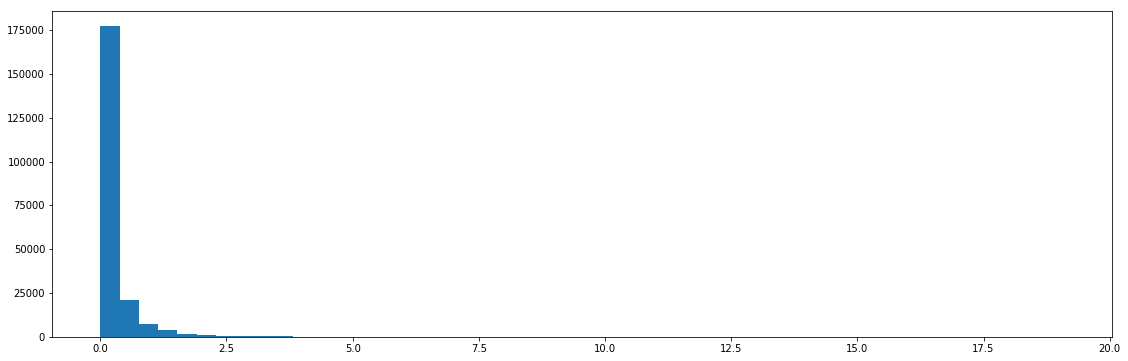

In [131]:
n = plt.hist(submissions['item_cnt_month'], bins=50)

In [128]:
print(np.cumsum(n[0]/submissions['item_cnt_month'].shape[0] * 100))
print(n[1])

[ 94.58450047  98.34687208  99.15919701  99.47712418  99.64612512
  99.74509804  99.80578898  99.84080299  99.87161531  99.89589169
  99.91596639  99.93137255  99.94211018  99.94911298  99.95938375
  99.96825397  99.97245565  99.97712418  99.99206349 100.        ]
[ 0.          0.95476781  1.90953561  2.86430342  3.81907122  4.77383903
  5.72860684  6.68337464  7.63814245  8.59291025  9.54767806 10.50244586
 11.45721367 12.41198148 13.36674928 14.32151709 15.27628489 16.2310527
 17.18582051 18.14058831 19.09535612]


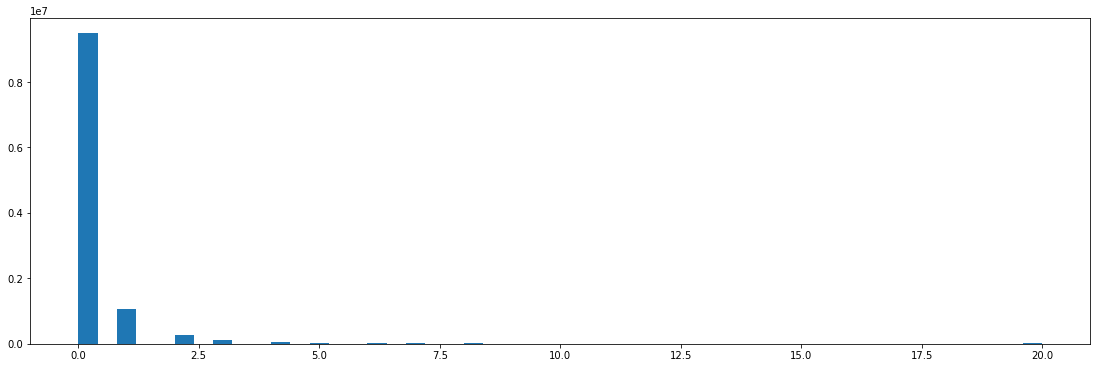

In [130]:
n = plt.hist(full_set['item_cnt_month'].clip(0,20), bins=50)

In [132]:
print(np.cumsum(n[0]/full_set['item_cnt_month'].shape[0] * 100))
print(n[1])

[1.59666332 1.78406351 1.84844939 1.88308405 1.89804975 1.90582543
 1.91146573 1.91533105 1.91788089 1.9198631  1.92134976 1.92260216
 1.92358426 1.92442219 1.92503488 1.92551241 1.92598093 1.92638639
 1.92667471 1.92688194 1.92713422 1.92743155 1.92755769 1.92775592
 1.92794513 1.92812533 1.92822444 1.92842266 1.92853979 1.92862989
 1.92870197 1.92883712 1.92886415 1.92893623 1.92897227 1.92902633
 1.92910742 1.9291795  1.92925158 1.92934169 1.9293507  1.92939575
 1.92942278 1.92945882 1.92951288 1.92955793 1.92969308 1.92986427
 1.92990031 1.92995437]
[ 0.          0.38190712  0.76381424  1.14572137  1.52762849  1.90953561
  2.29144273  2.67334986  3.05525698  3.4371641   3.81907122  4.20097835
  4.58288547  4.96479259  5.34669971  5.72860684  6.11051396  6.49242108
  6.8743282   7.25623532  7.63814245  8.02004957  8.40195669  8.78386381
  9.16577094  9.54767806  9.92958518 10.3114923  10.69339943 11.07530655
 11.45721367 11.83912079 12.22102791 12.60293504 12.98484216 13.36674928
 1

In [135]:
print(np.sum(catboost_test_pred))
print(np.sum(xgb_test_pred))
print(np.sum(rf_test_pred))
#print(np.sum(lr_test_pred))
#print(np.sum(mlp_test_pred))
#print(np.sum(lstm_test_pred))
print(np.sum(ensemble_test_pred))

69330.0584500303
66036.305
57586.82360384286
60896.42243213765


### TESTS

### Notes

In [ ]:
# Doing the .clip(0,20) has a huge impact on training the model
# In other words, dealing with outliers is very important
# Too many features does not necessarily improve the model. Can cause overfitting and deteriorate validation scores.